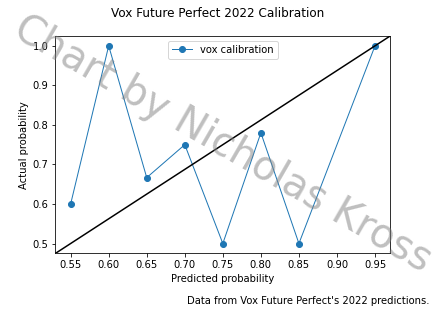

In [10]:
the_data = [["Democrats will lose their majorities in the US House and Senate", 0.85, False],
            ["Inflation in the US will average under 3 percent", 0.8, False],
            ["Unemployment in the US will fall below 4 percent by November", 0.8, True],
            ["The Supreme Court will overturn Roe v. Wade (65 percent)", 0.65, True],
            ["Stephen Breyer will retire from the Supreme Court", 0.55, True],
            ["Emmanuel Macron will be reelected as president of France", 0.65, True],
            ["Jair Bolsonaro will be reelected as president of Brazil", 0.55, False],
            ["Bongbong Marcos will be elected as president of the Philippines", 0.55, True],
            ["Rebels will NOT capture the Ethiopian capital of Addis Ababa", 0.55, True],
            ["Chinese GDP will continue to grow for the first three quarters of the year", 0.95, True],
            ["China will not reopen its borders in the first half of 2022", 0.8, True],
            ["20 percent of US children between 6 months and 5 years old will have received at least one Covid vaccine by year’s end", 0.65, False],
            ["The WHO will designate another variant of concern by year’s end", 0.75, False],
            ["12 billion shots will be given out against Covid-19 globally by November 2022", 0.8, True],
            ["... but at least one country will have less than 10 percent of people vaccinated with two shots by November 2022", 0.7, True],
            ["A psychedelic drug will be decriminalized or legalized in at least one new US state", 0.75, True],
            ["US government will not renew the ban on funding gain-of-function research", 0.6, True],
            ["AI will discover a new drug — or an old drug fit for new purposes — that’s promising enough for clinical trials", 0.85, True],
            ["The Biden administration will set the social cost of carbon at $100 per ton or more", 0.7, "Partially Right"],
            ["2022 will be warmer than 2021", 0.8, "Probably Right"],
            ["Kenneth Branagh’s Belfast will win Best Picture", 0.55, False],
            ["Norway will win the most medals at the 2022 Winter Olympics", 0.6, True]
            ]

what_counts_for_what = {True: 1.0,
             False: 0.0,
             "Partially Right": 0.5,  # change these two values to whatever you think they're worth.
             "Probably Right": 0.9}

credits = "Data from Vox Future Perfect's 2022 predictions."

numers_denoms = {}

for dataitem in the_data:
  predprob = dataitem[1]
  correct_out_of_this_one = what_counts_for_what[dataitem[2]]
  if predprob not in numers_denoms.keys():
    numers_denoms[predprob] = {"numright": correct_out_of_this_one, "total": 1}
  else:
    numers_denoms[predprob]["numright"] += correct_out_of_this_one
    numers_denoms[predprob]["total"] += 1

myKeys = list(numers_denoms.keys())
myKeys.sort()
sorted_numers_denoms = {i: numers_denoms[i] for i in myKeys}

x = []
y = []
for predprob in sorted_numers_denoms.keys():
  x.append(predprob)
  y.append(sorted_numers_denoms[predprob]["numright"] / sorted_numers_denoms[predprob]["total"])

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(x, y, marker='o', linewidth=1, label='vox calibration')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Vox Future Perfect 2022 Calibration')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('Actual probability')
ax.text(0.5, 0.5, "Chart by Nicholas Kross", transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation=-30)
plt.figtext(0.99, -0.05, credits, horizontalalignment='right')
plt.legend()
plt.show()